In [2]:
import os 
from os.path import join as pjoin 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score

DATA_DIR = '../../data'
os.environ['DATA_DIR'] = DATA_DIR


In [3]:
def read_ground_truth(sample_id):
    truth = pd.read_csv(pjoin(DATA_DIR, 'quality', f'sample_with_true_source_{sample_id}.csv'))
    return truth

def read_prediction(sample_id):
    pred = pd.read_excel(pjoin(DATA_DIR, 'quality', f'sample_{sample_id}_pred.xlsx'), header=1)[['index', 'judgment']]
    return pred

def merge_truth_and_pred(truth, pred):
    return truth.merge(pred, on='index')

In [4]:
truth = read_ground_truth(0)
pred = read_prediction(0)
result = merge_truth_and_pred(truth, pred)
result

,index,concept_id,feature,name,source,judgment
0,0,camcorder,is used to make movies,gpt_3_filtered,gpt,1
1,1,duck,is domestic,gpt_3_filtered_overlap,gpt,1
2,2,eggplant,grows in the ground,gpt_3_filtered,gpt,1
3,3,belt,is decorative,mcrae,human,2
4,4,broccoli,is found in supermarkets,gpt_3_filtered_overlap,gpt,2
...,...,...,...,...,...,...
1495,1495,tray,is square,mcrae,human,1
1496,1496,crayfish,has eyes,gpt_3_unfiltered,gpt,1
1497,1497,rock,is small,cslb,human,2
1498,1498,boots,is for men,cslb,human,2


# Explore

<AxesSubplot:>

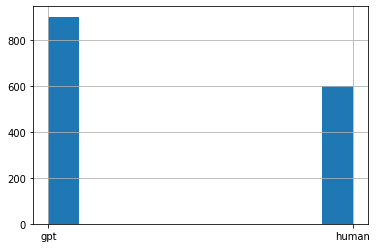

In [5]:
truth['source'].hist()

<AxesSubplot:>

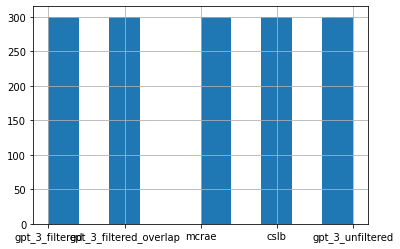

In [6]:
truth['name'].hist()

In [7]:
d = truth[['concept_id', 'feature']].duplicated()

In [9]:
def calc_relative_number_of_sensible_features(df):
    # calc relative number of features that are marked as sensible (1 or 2)
    # use bootstrap to calculate 95% CI

    def calc_for_sample(judgements, n_features):
        n_features_marked_as_sensible = len([judgement for judgement in judgements if judgement == 1 or judgement == 2])
        acc = n_features_marked_as_sensible / n_features * 100
        return acc
    
    judgements = df['judgment']
    n_features = df.shape[0]
    
    values = []
    for i in range(1000):
        judgements_bootstrap_sample = np.random.choice(judgements, n_features, replace=True)
        values.append(calc_for_sample(judgements_bootstrap_sample, n_features))

    sample_value = calc_for_sample(judgements, n_features)

    return (sample_value, np.asarray(values).std() * 1.96)

for source in ['human', 'gpt']:
    result_source = result[result['source'] == source]
    sample_acc, ci = calc_relative_number_of_sensible_features(result_source)
    print(f'{source}: {sample_acc:.2f} +- {ci:.2f}%  are marked with 1/2 (sensible)')

for name in ['gpt_3_filtered', 'gpt_3_unfiltered', 'mcrae', 'cslb', 'gpt_3_filtered_overlap']:
    result_source = result[result['name'] == name]
    sample_acc, ci = calc_relative_number_of_sensible_features(result_source)
    print(f'{name}: {sample_acc:.2f} +- {ci:.2f}% are marked with 1/2 (sensible)')


human: 92.67 +- 2.03%  are marked with 1/2 (sensible)
gpt: 89.11 +- 1.97%  are marked with 1/2 (sensible)
gpt_3_filtered: 88.33 +- 3.49% are marked with 1/2 (sensible)
gpt_3_unfiltered: 90.00 +- 3.25% are marked with 1/2 (sensible)
mcrae: 94.67 +- 2.46% are marked with 1/2 (sensible)
cslb: 90.67 +- 3.23% are marked with 1/2 (sensible)
gpt_3_filtered_overlap: 89.00 +- 3.40% are marked with 1/2 (sensible)


In [ ]:
result[result['source'] == 'gpt']

,index,concept_id,feature,name,source,judgment
0,0,camcorder,is used to make movies,gpt_3_filtered,gpt,human
1,1,duck,is domestic,gpt_3_filtered_overlap,gpt,human
2,2,eggplant,grows in the ground,gpt_3_filtered,gpt,human
4,4,broccoli,is found in supermarkets,gpt_3_filtered_overlap,gpt,human
8,8,asparagus,has small leaves,gpt_3_filtered,gpt,human
...,...,...,...,...,...,...
1491,1491,porthole,is clear,gpt_3_unfiltered,gpt,gpt
1493,1493,apple_tree,has leaves,gpt_3_filtered,gpt,human
1494,1494,hatbox,is used for transportation,gpt_3_filtered,gpt,gpt
1496,1496,crayfish,has eyes,gpt_3_unfiltered,gpt,human
